In [380]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import math

In [441]:
data = pd.read_csv('hate_crime.csv',low_memory =False)

In [442]:
data.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [443]:
data_new = data.drop(columns = ['ORI','PUB_AGENCY_NAME','PUB_AGENCY_UNIT','STATE_ABBR','DIVISION_NAME','POPULATION_GROUP_CODE','ADULT_VICTIM_COUNT',
                   'JUVENILE_VICTIM_COUNT','OFFENDER_ETHNICITY','ADULT_OFFENDER_COUNT','JUVENILE_OFFENDER_COUNT'])
data_new.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [444]:
data_new = data_new.dropna()
data_new

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168080,713162,2019,State Police,West Virginia,South,"MSA counties under 10,000",5-Jun-19,0,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Other Religion,Individual,S,S
168081,713164,2019,State Police,West Virginia,South,"MSA counties under 10,000",17-Nov-19,0,Unknown,1,All Other Larceny,1.0,Residence/Home,Anti-Jewish,Individual,S,S
168082,558879,2019,City,Wyoming,West,"Cities from 25,000 thru 49,999",19-Aug-19,0,Unknown,1,Intimidation,1.0,Government/Public Building,Anti-Gay (Male),Individual,S,S
168084,661208,2019,City,Wyoming,West,"Cities from 2,500 thru 9,999",5-Apr-19,1,American Indian or Alaska Native,1,All Other Larceny,1.0,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S


In [445]:
data_new['TOTAL_OFFENDER_COUNT'].max()


99

In [446]:
data_new['TOTAL_OFFENDER_COUNT'].idxmax()

14653

In [447]:
data_new['TOTAL_OFFENDER_COUNT'].mean()

0.8561214560706882

<Figure size 864x216 with 0 Axes>

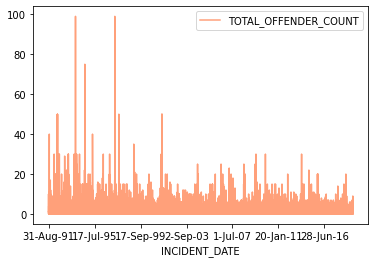

In [448]:
plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'TOTAL_OFFENDER_COUNT',color ='lightsalmon')


In [449]:
data_new['TOTAL_OFFENDER_COUNT'].nlargest(20)

14653    99
36011    99
19718    75
4815     50
4857     50
38217    50
38218    50
61576    50
61727    50
401      40
23897    40
46323    35
3045     30
4620     30
5631     30
5870     30
10712    30
10720    30
10721    30
10772    30
Name: TOTAL_OFFENDER_COUNT, dtype: int64

In [450]:
data_new=data_new.drop(data_new.index[[14653,36011,19718,4815,4857,38217,38218,61576,61727]])
data_new.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [451]:
data_new['TOTAL_OFFENDER_COUNT'].max()

40

<Figure size 864x216 with 0 Axes>

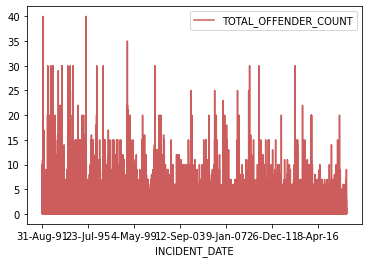

In [452]:
plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'TOTAL_OFFENDER_COUNT',color = 'indianred')

In [453]:
data_new['TOTAL_OFFENDER_COUNT'].nlargest(5)

401      40
23897    40
46323    35
3045     30
4620     30
Name: TOTAL_OFFENDER_COUNT, dtype: int64

count    165450.000000
mean          0.852705
std           1.259073
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          40.000000
Name: TOTAL_OFFENDER_COUNT, dtype: float64


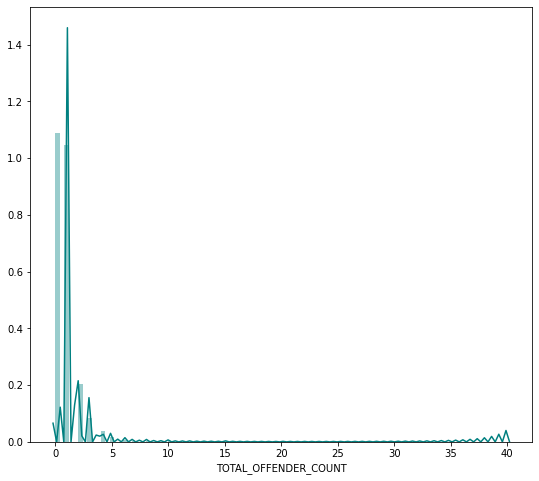

In [455]:
print(data_new['TOTAL_OFFENDER_COUNT'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_new['TOTAL_OFFENDER_COUNT'],bins = 100,color = 'teal');

In [456]:
data_new.isnull().any().any()

False

In [457]:
# nayev hetaqrqir e tujacneri tiv@ usti nuyn verlucutyun@ anenq nayev tujacneri hamar

<Figure size 864x216 with 0 Axes>

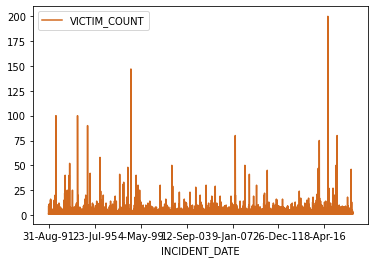

In [459]:
plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'VICTIM_COUNT',color='chocolate')

In [460]:
data_new.describe()

,INCIDENT_ID,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,165450.000000,165450.000000,165450.000000,165450.000000,165450.000000
mean,130589.506987,2004.340967,0.852705,1.262037,0.941584
std,143918.549249,8.012750,1.259073,1.243094,1.181452
min,2.000000,1991.000000,0.000000,1.000000,0.000000
25%,50060.250000,1998.000000,0.000000,1.000000,0.000000
50%,100902.000000,2004.000000,1.000000,1.000000,1.000000
75%,152243.750000,2011.000000,1.000000,1.000000,1.000000
max,727695.000000,2019.000000,40.000000,200.000000,147.000000


In [461]:
data_new.nunique()

INCIDENT_ID                 165450
DATA_YEAR                       29
AGENCY_TYPE_NAME                 8
STATE_NAME                      53
REGION_NAME                      6
POPULATION_GROUP_DESC           20
INCIDENT_DATE                10591
TOTAL_OFFENDER_COUNT            28
OFFENDER_RACE                    7
VICTIM_COUNT                    47
OFFENSE_NAME                    44
TOTAL_INDIVIDUAL_VICTIMS        43
LOCATION_NAME                  122
BIAS_DESC                      188
VICTIM_TYPES                    53
MULTIPLE_OFFENSE                 2
MULTIPLE_BIAS                    2
dtype: int64

In [462]:
#haskananq manramasn hancagorci rassan `

In [463]:
data_new['OFFENDER_RACE'].unique()

array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [464]:
#katarenq mi qani visualization
#1- mez hetqrqir e yuraqanchyur tarva hamar tujacneri qanak@
#group anel @st taretvi gcel barplot 

In [465]:
data1=data_new.groupby(['DATA_YEAR']).sum()[['VICTIM_COUNT']]
data1.head()

,VICTIM_COUNT
DATA_YEAR,
1991,4786
1992,6941
1993,7692
1994,6243
1995,8843


<Figure size 1584x504 with 0 Axes>

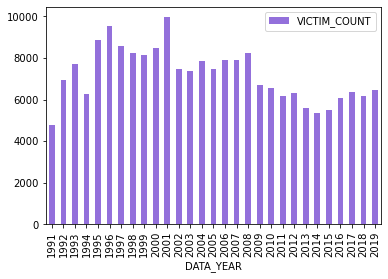

In [466]:
plt.figure(figsize=(22,7))
data1.plot(kind = 'bar',color ='mediumpurple')
plt.show()

In [467]:
#tesnum enq vor amenashat tujacner@ exel en 1995,1996,1997,1998,2000,2001
#hima haskananq vor tvin en exel amenashat case-er@
data1_large = data1['VICTIM_COUNT'].nlargest(6)
data1_large

DATA_YEAR
2001    9952
1996    9513
1995    8843
1997    8586
2000    8489
1998    8247
Name: VICTIM_COUNT, dtype: int64

In [468]:
data2=data_new.groupby(['DATA_YEAR']).count()[['INCIDENT_ID']]
data2.head()

,INCIDENT_ID
DATA_YEAR,
1991,3823
1992,5416
1993,6158
1994,4918
1995,6535


<Figure size 1584x504 with 0 Axes>

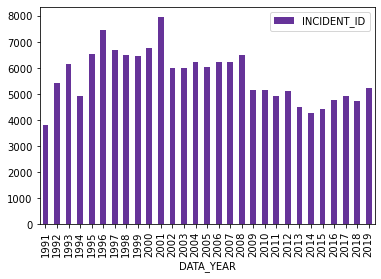

In [469]:
plt.figure(figsize=(22,7))
data2.plot(kind = 'bar',color ='rebeccapurple')

In [470]:
#hima haskananq erb en exel amenashat caser@ 1995,1996,1997,2000,2001,2008
data2['INCIDENT_ID'].nlargest(6)

DATA_YEAR
2001    7959
1996    7488
2000    6795
1997    6717
1995    6535
2008    6520
Name: INCIDENT_ID, dtype: int64

In [471]:
#mez hetaqrqrum en 1995,1996,1997,1998,2000,2001,2008 tariner@ vortex exel en amenashat caser@ u amenashat tujacner@
#hima haskananq te vor nahangnerum en exel tvyal tverin hacagorcutyunner@
#arandznacnenq ay tarineri hancagorcutyun@ (filter anenq)

In [472]:
filter_list = [1995,1996,1997,1998,2000,2001,2008 ]
filtered_data1 = data_new[data_new['DATA_YEAR'].isin(filter_list)]
filtered_data1.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
20319,29565,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",5-Mar-95,1,White,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
20320,29567,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",13-Jun-95,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
20321,29568,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",21-Sep-95,1,White,1,Intimidation,1.0,Commercial/Office Building,Anti-Black or African American,Individual,S,S
20322,29569,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",27-Sep-95,1,White,1,Intimidation,1.0,Residence/Home,"Anti-Multiple Races, Group",Individual,S,S
20323,29571,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",30-Oct-95,3,White,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S


In [473]:
#hima group by anenq @st taretvi ev @st nahangi 
filtered_data = filtered_data1.groupby(['DATA_YEAR','STATE_NAME']).count()[['INCIDENT_ID']]
filtered_data.head()

INCIDENT_ID
DATA_YEAR STATE_NAME             
1995      Alaska                6
          Arizona             179
          Arkansas              6
          California         1481
          Colorado            125

In [474]:
filtered_data = filtered_data.unstack()
filtered_data

INCIDENT_ID                                              \
STATE_NAME     Alabama Alaska Arizona Arkansas California Colorado   
DATA_YEAR                                                            
1995               NaN    6.0   179.0      6.0     1481.0    125.0   
1996               NaN    8.0   198.0      1.0     1738.0    115.0   
1997               NaN    9.0   246.0      NaN     1520.0     94.0   
1998               NaN    NaN   230.0      1.0     1379.0    104.0   
2000               NaN    4.0   231.0      3.0     1583.0     85.0   
2001               NaN   18.0   313.0      3.0     1729.0    106.0   
2008               9.0    6.0   150.0     66.0     1149.0    134.0   

                                                              ...  \
STATE_NAME Connecticut Delaware District of Columbia Florida  ...   
DATA_YEAR                                                     ...   
1995              82.0     34.0                  2.0   141.0  ...   
1996             102.0     64.0                 12.0   151.0  ...   
1997             108.0     50.0                  6.0   106.0  ...   
1998             109.0     18.0                  4.0   153.0  ...   
2000             150.0     31.0                  3.0   192.0  ...   
2001             157.0     15.0                  8.0   256.0  ...   
2008             153.0     55.0                 26.0   124.0  ...   

                                                                            \
STATE_NAME South Dakota Tennessee  Texas  Utah Vermont Virginia Washington   
DATA_YEAR                                                                    
1995                4.0      11.0  248.0  75.0     5.0     50.0      224.0   
1996                1.0      27.0  253.0  42.0     2.0     90.0      164.0   
1997               15.0      44.0  242.0  39.0     3.0     81.0      155.0   
1998                8.0      56.0  240.0  53.0     3.0    123.0      194.0   
2000                4.0     184.0  236.0  56.0    14.0    239.0      195.0   
2001                1.0     147.0  364.0  50.0    10.0    268.0      232.0   
2008               31.0     217.0  201.0  27.0    16.0    205.0      198.0   

                                            
STATE_NAME West Virginia Wisconsin Wyoming  
DATA_YEAR                                   
1995                 NaN      35.0     6.0  
1996                 4.0      30.0     4.0  
1997                 2.0      33.0     3.0  
1998                13.0       NaN     5.0  
2000                48.0      33.0     8.0  
2001                27.0      43.0     7.0  
2008                33.0      67.0     6.0  

[7 rows x 50 columns]

In [475]:
b = filtered_data.sort_values(by = [1997, 2001], axis = 1,ascending = False)
b

INCIDENT_ID                                                      \
STATE_NAME  California New York New Jersey Massachusetts Michigan Maryland   
DATA_YEAR                                                                    
1995            1481.0    739.0      694.0         302.0    288.0    286.0   
1996            1738.0    890.0      767.0         420.0    388.0    333.0   
1997            1520.0    800.0      639.0         404.0    335.0    276.0   
1998            1379.0    677.0      705.0         409.0    287.0    239.0   
2000            1583.0    601.0      603.0         396.0    321.0    175.0   
2001            1729.0    693.0      717.0         494.0    332.0    200.0   
2008            1149.0    483.0      707.0         273.0    444.0     88.0   

                                           ...                            \
STATE_NAME Arizona  Texas Illinois   Ohio  ... Vermont Louisiana Wyoming   
DATA_YEAR                                  ...                             
1995         179.0  248.0     94.0  186.0  ...     5.0       7.0     6.0   
1996         198.0  253.0    262.0  189.0  ...     2.0       3.0     4.0   
1997         246.0  242.0    238.0  213.0  ...     3.0       3.0     3.0   
1998         230.0  240.0    203.0  197.0  ...     3.0       6.0     5.0   
2000         231.0  236.0    134.0  190.0  ...    14.0       9.0     8.0   
2001         313.0  364.0    196.0  292.0  ...    10.0       9.0     7.0   
2008         150.0  201.0    100.0  277.0  ...    16.0      46.0     6.0   

                                                                       \
STATE_NAME Nebraska West Virginia North Dakota New Hampshire Arkansas   
DATA_YEAR                                                               
1995            NaN           NaN          2.0          24.0      6.0   
1996            2.0           4.0          NaN           NaN      1.0   
1997            2.0           2.0          1.0           NaN      NaN   
1998           33.0          13.0          1.0          13.0      1.0   
2000           14.0          48.0          3.0          25.0      3.0   
2001           33.0          27.0         10.0          24.0      3.0   
2008           68.0          33.0         12.0          32.0     66.0   

                                
STATE_NAME Mississippi Alabama  
DATA_YEAR                       
1995               6.0     NaN  
1996               3.0     NaN  
1997               NaN     NaN  
1998               3.0     NaN  
2000               2.0     NaN  
2001               3.0     NaN  
2008               4.0     9.0  

[7 rows x 50 columns]

In [476]:
#arandznacnenq nahangner@ California,New York,New Jersey,Massachusetts,Maryland,Texas
#gtnenq tokosayin haraberutyun@ irenc bnakcutyan hamemat 


In [477]:
#gtnenq tvyalner amen tasamyakneri ev nahangneri hamar voronq mez hetaqrqrum en 
# 1995-1998 California = 29760021,New York = 17990455,New Jersey = 7730188, Massachusetts = 6016425 ,Maryland=4781468,
#Texas = 16986510
#2000-2001 California = 33871648, New York = 18976457,New Jersey = 8414350, Massachusetts = 6349097,Maryland= 5296486,
#Texas =20851820
#2008 California = 37253956,New York = 19378102,New Jersey =8791894,Massachusetts = 6547629,Maryland=5773552,
#Texas = 25145561


In [478]:
#index 1990-1998,2000-2001,2008
#syuner@ tokosayin haraberutyunner@ amen nahangi hamar

In [479]:
# karucenq nor data frame 
mean_california = [b.iloc[0:4,0].mean(),b.iloc[4:6,0].mean(),1149]
mean_new_york = [b.iloc[0:4,1].mean(),b.iloc[4:6,1].mean(),483]
mean_new_jersey = [b.iloc[0:4,2].mean(),b.iloc[4:6,1].mean(),707]
mean_massachusetts = [b.iloc[0:4,3].mean(),b.iloc[4:6,3].mean(),273]
mean_maryland = [b.iloc[0:4,5].mean(),b.iloc[4:6,5].mean(),88]
mean_texas = [b.iloc[0:4,7].mean(),b.iloc[4:6,7].mean(),201]

In [480]:
percent_california = [(mean_california[0] / 29760021)*100,mean_california[1]/33871648*100,mean_california[2]/37253956*100]
percent_ny = [(mean_new_york[0] / 17990455)*100,(mean_new_york[1]/18976457)*100,(mean_new_york[2]/19378102)*100]
percent_nj = [(mean_new_jersey[0] /7730188 )*100,(mean_new_jersey[1]/8414350)*100,(mean_new_jersey[2]/8791894)*100]
percent_mas = [(mean_massachusetts[0] / 6016425)*100,(mean_massachusetts[1]/6349097)*100,(mean_massachusetts[2]/6547629)*100]
percent_mary= [(mean_maryland[0] / 4781468)*100,(mean_maryland[1]/5296486)*100,(mean_maryland[2]/5773552)*100]
percent_texas = [(mean_texas[0] /16986510 )*100,(mean_texas[1]/20851820)*100,(mean_texas[2]/ 25145561)*100]
lst = [percent_california,percent_ny,percent_nj,percent_mas,percent_mary,percent_texas ]
lst


[[0.0051394452981064764, 0.004889044666501021, 0.003084236208364019],
 [0.004316177661987982, 0.0034094878722619295, 0.002492504167848843],
 [0.009071577560597491, 0.007689245158568398, 0.008041498225524557],
 [0.0063783725385091646, 0.007008870710275807, 0.0041694482078932695],
 [0.005929141426858864, 0.0035400829908735715, 0.0015241916934323966],
 [0.00144673626306993, 0.001438723334461932, 0.0007993458567100572]]

In [481]:
lst= np.array(lst)
lst_new=np.transpose(lst)
lst_new

array([[0.00513945, 0.00431618, 0.00907158, 0.00637837, 0.00592914,
        0.00144674],
       [0.00488904, 0.00340949, 0.00768925, 0.00700887, 0.00354008,
        0.00143872],
       [0.00308424, 0.0024925 , 0.0080415 , 0.00416945, 0.00152419,
        0.00079935]])

In [482]:
df = pd.DataFrame(lst_new, index =['1995-1998', '2000-2001', '2008'], 
                                              columns =['percent_california','percent_ny','percent_nj','percent_mas','percent_mary','percent_texas']) 

In [483]:
df

,percent_california,percent_ny,percent_nj,percent_mas,percent_mary,percent_texas
1995-1998,0.005139,0.004316,0.009072,0.006378,0.005929,0.001447
2000-2001,0.004889,0.003409,0.007689,0.007009,0.003540,0.001439
2008,0.003084,0.002493,0.008041,0.004169,0.001524,0.000799


In [484]:
# stacanq tokosayin haraberutyamb te vortex inchqan en exel hancagorcutyunner@ 
# ayspisov arandznacnenq new jersey,massachusets,california,new york
#filter anenq ays nahangner@ haskananq te hancagorcurtyunneri mec masi bias@(aysinqn patchar@)

In [485]:
filter_list_state = ['California','New York','New Jersey','Massachusetts']
filtered_state = filtered_data1[filtered_data1['STATE_NAME'].isin(filter_list_state)]
filtered_state

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
20510,24956,1995,County,California,West,"MSA counties 100,000 or over",22-Jan-95,0,Unknown,4,Destruction/Damage/Vandalism of Property,2.0,Residence/Home,Anti-Other Religion,Individual,M,S
20511,24957,1995,County,California,West,"MSA counties 100,000 or over",10-May-95,0,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
20512,24958,1995,County,California,West,"MSA counties 100,000 or over",14-Jul-95,1,Black or African American,2,Intimidation,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-White,Individual,M,S
20513,24959,1995,County,California,West,"MSA counties 100,000 or over",18-Nov-95,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Asian,Individual,S,S
20514,24942,1995,City,California,West,"Cities from 50,000 thru 99,999",17-Feb-95,1,White,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110436,132267,2008,State Police,New York,Northeast,"MSA counties under 10,000",26-Jun-08,0,Unknown,1,Burglary/Breaking & Entering,1.0,Other/Unknown,Anti-Bisexual,Individual;Other,M,S
110437,132268,2008,State Police,New York,Northeast,"Non-MSA counties under 10,000",3-Apr-08,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Other/Unknown,Anti-Bisexual,Individual;Other,M,S
110438,132269,2008,State Police,New York,Northeast,"Non-MSA counties under 10,000",23-Sep-08,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Other/Unknown,Anti-Black or African American,Business;Individual,M,S
110439,132270,2008,State Police,New York,Northeast,"MSA counties under 10,000",7-Apr-08,0,Unknown,1,Burglary/Breaking & Entering,1.0,Other/Unknown,Anti-Black or African American,Individual;Other,M,S


In [486]:
filtered_state1 = filtered_state.groupby(['STATE_NAME','BIAS_DESC']).count()[['INCIDENT_ID']]
filtered_state1.head()

INCIDENT_ID
STATE_NAME BIAS_DESC                                         
California Anti-American Indian or Alaska Native           15
           Anti-Asian                                     689
           Anti-Asian;Anti-Gay (Male)                       1
           Anti-Atheism/Agnosticism                         3
           Anti-Bisexual                                    3

In [487]:
filtered_state = filtered_state1.unstack()
filtered_state

INCIDENT_ID                       \
BIAS_DESC     Anti-American Indian or Alaska Native Anti-Arab Anti-Asian   
STATE_NAME                                                                 
California                                     15.0       NaN      689.0   
Massachusetts                                  22.0      37.0      154.0   
New Jersey                                      6.0      95.0       89.0   
New York                                        1.0       NaN        4.0   

                                                                   \
BIAS_DESC     Anti-Asian;Anti-Gay (Male) Anti-Atheism/Agnosticism   
STATE_NAME                                                          
California                           1.0                      3.0   
Massachusetts                        NaN                      NaN   
New Jersey                           NaN                      NaN   
New York                             NaN                      2.0   

                                                            \
BIAS_DESC     Anti-Bisexual Anti-Black or African American   
STATE_NAME                                                   
California              3.0                         3376.0   
Massachusetts           NaN                          881.0   
New Jersey             10.0                         1940.0   
New York                6.0                         1220.0   

                                                              \
BIAS_DESC     Anti-Black or African American;Anti-Gay (Male)   
STATE_NAME                                                     
California                                               2.0   
Massachusetts                                            NaN   
New Jersey                                               NaN   
New York                                                 NaN   

                                                                         \
BIAS_DESC     Anti-Black or African American;Anti-Gay (Male);Anti-White   
STATE_NAME                                                                
California                                                   1.0          
Massachusetts                                                NaN          
New Jersey                                                   NaN          
New York                                                     NaN          

                                                                      ...  \
BIAS_DESC     Anti-Black or African American;Anti-Hispanic or Latino  ...   
STATE_NAME                                                            ...   
California                                                   NaN      ...   
Massachusetts                                                1.0      ...   
New Jersey                                                   NaN      ...   
New York                                                     NaN      ...   

                                     \
BIAS_DESC     Anti-Lesbian (Female)   
STATE_NAME                            
California                    241.0   
Massachusetts                  74.0   
New Jersey                     64.0   
New York                       98.0   

                                                                         \
BIAS_DESC     Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)   
STATE_NAME                                                                
California                                                 177.0          
Massachusetts                                               17.0          
New Jersey                                                  29.0          
New York                                                    49.0          

                                                                 \
BIAS_DESC     Anti-Mental Disability Anti-Multiple Races, Group   
STATE_NAME                                                        
California                       NaN                      545.0   
Massa

In [488]:
filtered_state_order = filtered_state.sort_values(by = ['New Jersey', 'Massachusetts'], axis = 1,ascending = False)
filtered_state_order

INCIDENT_ID                         \
BIAS_DESC     Anti-Black or African American Anti-Jewish Anti-White   
STATE_NAME                                                            
California                            3376.0      1260.0      711.0   
Massachusetts                          881.0       414.0      304.0   
New Jersey                            1940.0      1481.0      235.0   
New York                              1220.0      1980.0      295.0   

                                                                          \
BIAS_DESC     Anti-Hispanic or Latino Anti-Other Race/Ethnicity/Ancestry   
STATE_NAME                                                                 
California                      894.0                              758.0   
Massachusetts                   281.0                               87.0   
New Jersey                      222.0                              217.0   
New York                        232.0                              366.0   

                                                                        \
BIAS_DESC     Anti-Gay (Male) Anti-Arab Anti-Asian Anti-Other Religion   
STATE_NAME                                                               
California             1422.0       NaN      689.0               161.0   
Massachusetts           338.0      37.0      154.0                28.0   
New Jersey              159.0      95.0       89.0                77.0   
New York                332.0       NaN        4.0               254.0   

                                     ...  \
BIAS_DESC     Anti-Islamic (Muslim)  ...   
STATE_NAME                           ...   
California                     96.0  ...   
Massachusetts                  27.0  ...   
New Jersey                     67.0  ...   
New York                        5.0  ...   

                                                                            \
BIAS_DESC     Anti-American Indian or Alaska Native Anti-Mental Disability   
STATE_NAME                                                                   
California                                     15.0                    NaN   
Massachusetts                                  22.0                    5.0   
New Jersey                                      6.0                    4.0   
New York                                        1.0                    NaN   

                                        \
BIAS_DESC     Anti-Physical Disability   
STATE_NAME                               
California                         9.0   
Massachusetts                      1.0   
New Jersey                         4.0   
New York                           1.0   

                                                                      \
BIAS_DESC     Anti-Black or African American;Anti-Hispanic or Latino   
STATE_NAME                                                             
California                                                   NaN       
Massachusetts                                                1.0       
New Jersey                                                   NaN       
New York                                                     NaN       

                                                                   \
BIAS_DESC     Anti-Asian;Anti-Gay (Male) Anti-Atheism/Agnosticism   
STATE_NAME                                                          
California                           1.0                      3.0   
Massachusetts                        NaN                      NaN   
New Jersey                           NaN                      NaN   
New York                             NaN                      2.0   

                                                              \
BIAS_DESC     Anti-Black or African American;Anti-Gay (Male)   
STATE_NAME                                                     
California                                               2.0   
Massachusetts                                            NaN   
New Jersey             

[Text(0, 0, 'Anti-American Indian or Alaska Native'),
 Text(0, 0, 'Anti-Asian'),
 Text(0, 0, 'Anti-Asian;Anti-Gay (Male)'),
 Text(0, 0, 'Anti-Atheism/Agnosticism'),
 Text(0, 0, 'Anti-Bisexual'),
 Text(0, 0, 'Anti-Black or African American'),
 Text(0, 0, 'Anti-Black or African American;Anti-Gay (Male)'),
 Text(0, 0, 'Anti-Black or African American;Anti-Gay (Male);Anti-White'),
 Text(0, 0, 'Anti-Black or African American;Anti-White'),
 Text(0, 0, 'Anti-Catholic'),
 Text(0, 0, 'Anti-Gay (Male)'),
 Text(0, 0, 'Anti-Heterosexual'),
 Text(0, 0, 'Anti-Hispanic or Latino'),
 Text(0, 0, 'Anti-Islamic (Muslim)'),
 Text(0, 0, 'Anti-Jewish'),
 Text(0, 0, 'Anti-Lesbian (Female)'),
 Text(0, 0, 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'),
 Text(0, 0, 'Anti-Multiple Races, Group'),
 Text(0, 0, 'Anti-Multiple Religions, Group'),
 Text(0, 0, 'Anti-Other Race/Ethnicity/Ancestry'),
 Text(0, 0, 'Anti-Other Religion'),
 Text(0, 0, 'Anti-Physical Disability'),
 Text(0, 0, 'Anti-Protestant'),

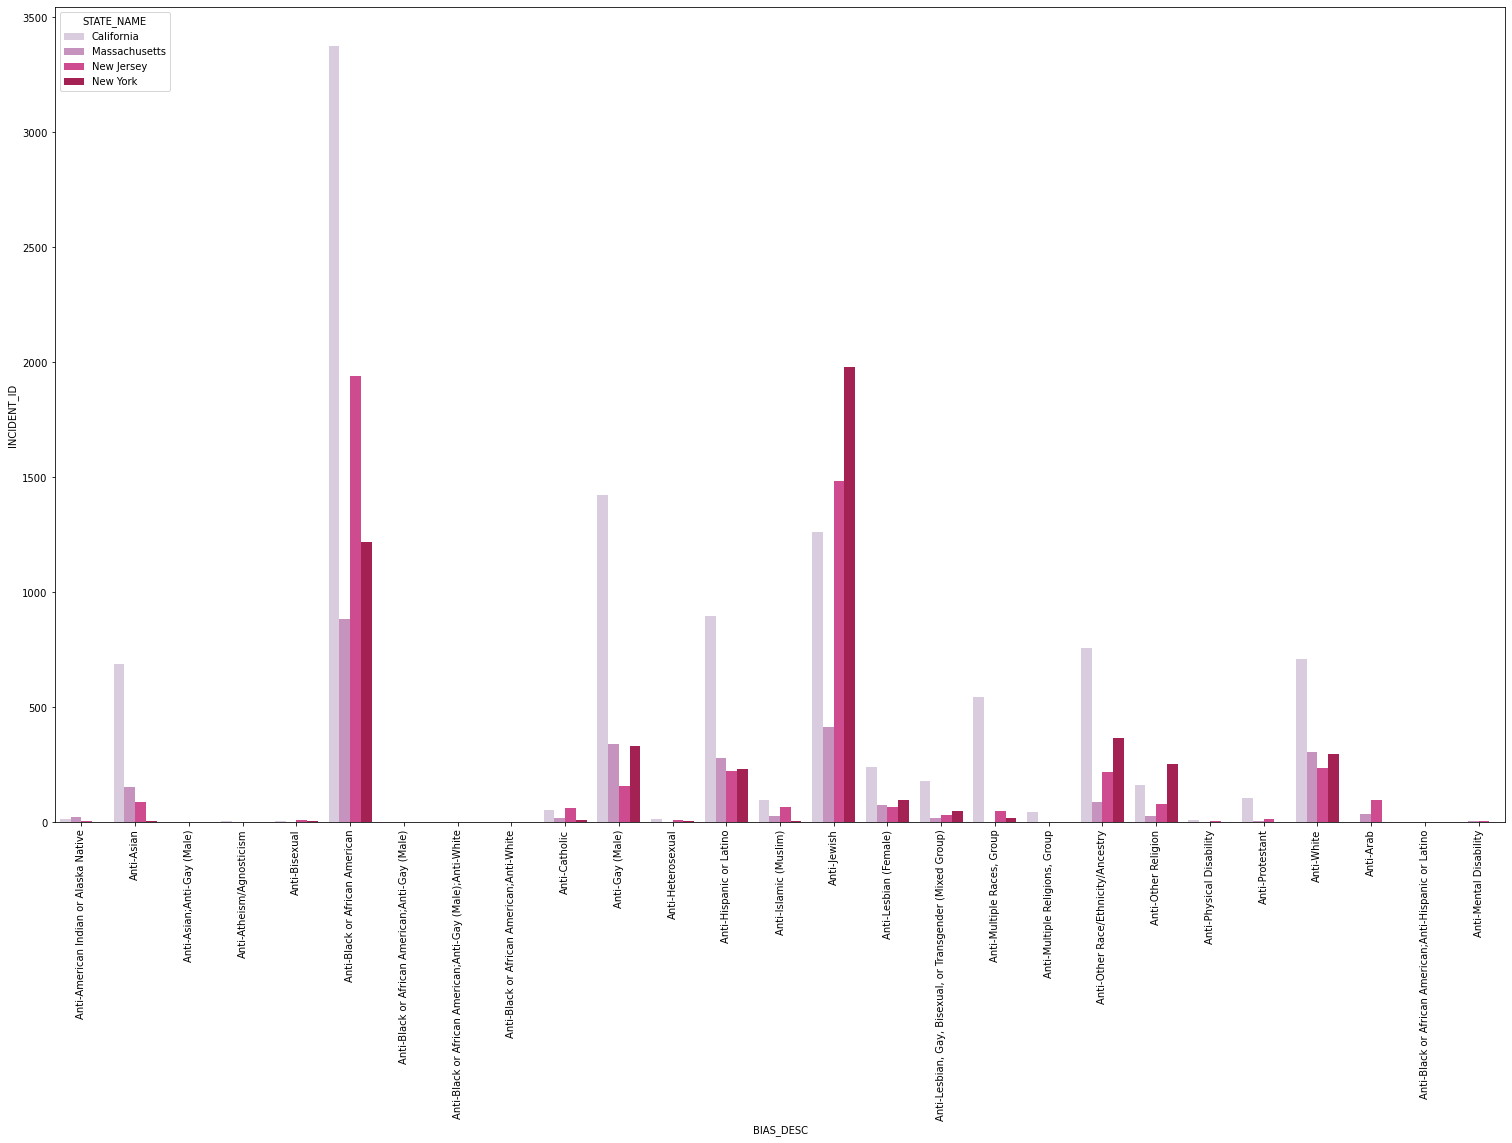

In [489]:
plt.figure(figsize=(26,15))
graph = sns.barplot(x = 'BIAS_DESC',y = 'INCIDENT_ID', hue = 'STATE_NAME', data = filtered_state1.reset_index(),palette = 'PuRd')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
#graph.set_xticklabels(graph.set_xticklabels(),rotation = 30)

In [490]:
# inchpes karox enq tesnel 4 ayn nahangnerum vortex grancvel en amenashat hancagorcutyunner@ amenamec tver@ unen 
# afroamerikineri dem hancagorcutyunner@, hamozvelu hamar evs gtnenq irenc tokosayin haraberutyunner@


California = filtered_state_order.iloc[0,0]/b.iloc[:,0].sum()
Massachusetts = filtered_state_order.iloc[1,0]/b.iloc[:,3].sum()
New_Jersey= filtered_state_order.iloc[2,0]/b.iloc[:,2].sum()
New_York = filtered_state_order.iloc[3,0]/b.iloc[:,1].sum()

states = [California,Massachusetts,New_Jersey,New_York]
states

[0.3191227904338784,
 0.32653817642698296,
 0.4014900662251656,
 0.24984640589801352]

In [491]:
#Hima uzum enq haskanal ardyoq New Jersey-um rassayakan xtrakanutyun@ aveli bardzr e qan Massachusets@, aysinqn ardyoq ays 2 nahangner
#hancagorcutyuneri tesakneri mijev ka tarberutyun
#te nranc mijev statistically difference chka 
# dra hamar vercnum enq irenc 2 i proportion@ ev sahmanum enq 0 akan hypothes 
#H0: p1-p2 = 0 
#H1:p1-p2!=0 
p1 = Massachusetts
p2 = New_Jersey
p_a = (filtered_state_order.iloc[1,0]+filtered_state_order.iloc[2,0])/(b.iloc[:,3].sum()+b.iloc[:,2].sum())
n1 = b.iloc[:,3].sum()
n2 = b.iloc[:,2].sum()

score = (p1-p2)/math.sqrt((p_a*(1-p_a))*(1/n1+1/n2))


In [492]:
p_value = scipy.stats.norm.sf(abs(score))*2
p_value

1.170145819847004e-10

In [493]:
np.round(1.170145819847004e-10,2)

0.0

In [494]:
#hypothes@ chi @ndunvum ,aysinqn nranc mijev arka e tarberutyun, ev mer entadrutyun@ vor aystex afroamerikacineri
#rassayakan xtrakanutyun ka i tarberutyun ayl nahangneri hastatvum e 

In [495]:
#menq hima cankanum enq stugel  ardyoq ka tarberutyun hancagorcutyunneri mijinneri mijev Californiayi ev New yorki mijev 

In [496]:
filtered_data_hypothesis = data_new.groupby(['DATA_YEAR','STATE_NAME']).count()[['INCIDENT_ID']]
filtered_data_hypothesis.head()

INCIDENT_ID
DATA_YEAR STATE_NAME              
1991      Arizona               43
          Arkansas              11
          California             5
          Colorado             101
          Connecticut           59

In [497]:
f_h = filtered_data_hypothesis.unstack()
filtered_data_hypothesis

INCIDENT_ID
DATA_YEAR STATE_NAME                
1991      Arizona                 43
          Arkansas                11
          California               5
          Colorado               101
          Connecticut             59
...                              ...
2019      Virginia               121
          Washington             412
          West Virginia           44
          Wisconsin               51
          Wyoming                  3

[1382 rows x 1 columns]

In [498]:
h = f_h.sort_values(by = [1997, 2019], axis = 1,ascending = False)
h

INCIDENT_ID                                                      \
STATE_NAME  California New York New Jersey Massachusetts Michigan Maryland   
DATA_YEAR                                                                    
1991               5.0    942.0      776.0         157.0      NaN    319.0   
1992              60.0   1023.0      970.0         346.0     94.0    381.0   
1993             279.0    843.0      974.0         270.0    212.0    321.0   
1994             266.0    863.0      799.0           NaN    206.0    263.0   
1995            1481.0    739.0      694.0         302.0    288.0    286.0   
1996            1738.0    890.0      767.0         420.0    388.0    333.0   
1997            1520.0    800.0      639.0         404.0    335.0    276.0   
1998            1379.0    677.0      705.0         409.0    287.0    239.0   
1999            1541.0    520.0      565.0         391.0    310.0    190.0   
2000            1583.0    601.0      603.0         396.0    321.0    175.0   
2001            1729.0    693.0      717.0         494.0    332.0    200.0   
2002            1255.0    655.0      547.0         358.0    321.0    175.0   
2003            1092.0    532.0      561.0         317.0    322.0    219.0   
2004            1116.0    354.0      723.0         296.0    418.0    221.0   
2005            1148.0    444.0      686.0         319.0    461.0    168.0   
2006            1069.0    441.0      708.0         323.0    489.0    189.0   
2007            1174.0    434.0      704.0         292.0    491.0    140.0   
2008            1149.0    483.0      707.0         273.0    444.0     88.0   
2009             840.0    406.0      522.0         261.0    232.0     91.0   
2010             878.0    412.0      518.0         268.0    247.0     72.0   
2011             854.0    362.0      479.0         297.0    307.0     39.0   
2012             710.0    483.0      474.0         237.0    505.0     27.0   
2013             657.0    352.0      389.0         282.0    254.0     40.0   
2014             603.0    332.0      325.0         306.0    250.0     12.0   
2015             649.0    281.0      317.0         321.0    230.0     31.0   
2016             732.0    386.0      274.0         328.0    318.0     28.0   
2017             708.0     60.0      320.0         354.0    348.0     72.0   
2018             703.0     44.0      428.0         292.0    311.0     33.0   
2019             622.0     49.0      657.0         316.0    307.0     18.0   

                                           ...                         \
STATE_NAME Arizona  Texas Illinois   Ohio  ... West Virginia Nebraska   
DATA_YEAR                                  ...                          
1991          43.0   72.0    102.0   73.0  ...           NaN      NaN   
1992         123.0  378.0    151.0   65.0  ...           NaN      NaN   
1993         160.0  334.0    499.0  142.0  ...           NaN      NaN   
1994         177.0  277.0    161.0  255.0  ...           NaN      NaN   
1995         179.0  248.0     94.0  186.0  ...           NaN      NaN   
1996         198.0  253.0    262.0  189.0  ...           4.0      2.0   
1997         246.0  242.0    238.0  213.0  ...           2.0      2.0   
1998         230.0  240.0    203.0  197.0  ...          13.0     33.0   
1999         204.0  201.0    179.0  165.0  ...          20.0     26.0   
2000         231.0  236.0    134.0  190.0  ...          48.0     14.0   
2001         313.0  364.0    196.0  292.0  ...          27.0     33.0   
2002         186.0  249.0    112.0  197.0  ...          30.0     41.0   
2003         204.0  232.0    158.0  186.0  ...          22.0     31.0   
2004         179.0  225.0    123.0  279.0  ...          33.0     42.0   
2005         157.0  194.0    109.0  145.0  ...          34.0     53.0   
2006         143.0  173.0    121.0  236.0  ...          23.0     32.0   
2007         143.0  183.0    124.0  218.0  ...          34.0     30.0   
2008         150.0  201.0    100.0  277.0  ...        

In [499]:
aa = h.iloc[:,0]
bb = h.iloc[:,1]

In [500]:
scipy.stats.ttest_ind(aa,bb)

Ttest_indResult(statistic=4.266977575065984, pvalue=7.711936798808524e-05)

In [501]:
np.round(7.711936798808524e-05,2)

0.0

In [502]:
#menq merjum enq ays hypotesis@ ev arajarkvumenq alternativ@, unenq sufficient evidence entadrelu vor Californiayum  ev New Yorkum texi 
#unecox hancagorcutyunneri mijin qanakneri mijev ka tarberutyun  